In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'bigearthnet',
 'binarized_mnist',
 'binary_alpha_digits',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'clevr',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kitti',
 'kmnist',
 'lfw',
 'lm1b',
 'lsun',
 'mnist',
 'mnist_corrupted',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',

In [2]:
data, info = tfds.load(name='fashion_mnist', as_supervised=True, split=None, with_info=True)
print(info)

    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Bad argument number for Name: 3, expecting 4
tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        

In [3]:
train, test = data['train'], data['test']

In [4]:
BUFFER_SIZE = 10 # Use a much larger value for real code.
BATCH_SIZE = 64
NUM_EPOCHS = 5

def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    
    return image, label

train_data = train.map(normalize).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_data = test.map(normalize).batch(BATCH_SIZE)

STEPS_PER_EPOCH = 5

train_data = train_data.take(STEPS_PER_EPOCH)
test_data = test_data.take(STEPS_PER_EPOCH)

In [5]:
image_batch, label_batch = next(iter(train_data))

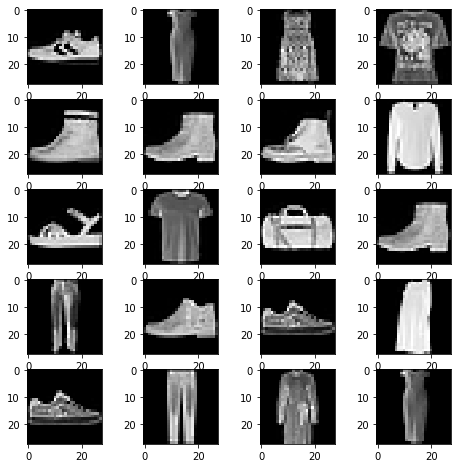

In [7]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.random.randint(0, BATCH_SIZE, size=30)
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_batch[idx[i],:,:,0], cmap='gray')
plt.show()

In [8]:
model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(32, 3, activation='relu', 
                                                   kernel_regularizer=tf.keras.regularizers.l2(0.02), input_shape=(28, 28, 1)),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dropout(0.1),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dense(10, activation='softmax')
                            ])

In [9]:
# Model is the full model w/o custom layers
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_data, epochs = NUM_EPOCHS)
loss, acc = model.evaluate(test_data)
print("Loss {}, Accuracy {}".format(loss, acc))

Epoch 1/5


5/5 [==============================] - 1s 146ms/step - loss: 1.5871 - accuracy: 0.4344
Epoch 2/5
5/5 [==============================] - 0s 32ms/step - loss: 0.7815 - accuracy: 0.7406
Epoch 3/5
5/5 [==============================] - 0s 33ms/step - loss: 0.6133 - accuracy: 0.8469
Epoch 4/5
5/5 [==============================] - 0s 29ms/step - loss: 0.4834 - accuracy: 0.8687
Epoch 5/5
5/5 [==============================] - 0s 27ms/step - loss: 1.6418 - accuracy: 0.6938
Loss 1.6417517900466918, Accuracy 0.6937500238418579
